# Autoencoders

La arquitectura de una red neuronal llamada Autoencoder consiste en una capa de entrada que contiene N neuronas, una capa intermedia que contiene M neuronas y una capa de salida que tiene N neuronas al igual que la entrada y ademas tiene las siguientes propiedades:
1. M es menor que N
2. El valor esperado de la capa de salida es igual al valor de la capa de entrada, es decir debe salir el mismo valor que ingreso

Veamos un ejemplo:

Queremos codificar la altura de la sombra de un animal que puede ser una iguana, un caballo o una jirafa

## Entradas y salidas de la red neuronal

X tiene 3 vectores representando la altura de la sombra de cada animal:

In [1]:
import numpy as np

animales = {"Iguana":0, "Caballo":1, "Jirafa":2}

X = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

y = X  # la salida es igual a la entrada

for nombre, idx in animales.items():
    print(f"Altura {nombre:8}: {X[idx]}")

Altura Iguana  : [0 0 0 0 0 0 0 0 0 1]
Altura Caballo : [0 0 0 0 0 1 1 1 1 1]
Altura Jirafa  : [1 1 1 1 1 1 1 1 1 1]


## Entrenamiento de la red neuronal

La siguiente red tiene 10 entradas, 3 neuronas en la capa oculta y 10 salidas.
Entrenaremos la red durante 10 mil iteraciones:

In [2]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3,), 
                      activation='logistic', 
                      max_iter=10000,
                      random_state=None #iniciacion aleatoria de los pesos
                      )

model.fit(X, y);

In [4]:
#@title Codigo para dibujar una red neuronal de sklearn {display-mode:"form"}
import matplotlib.pyplot as plt

import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
sigmoid_v = np.vectorize(sigmoid)

def draw_neural_net_rectangular(ax, layer_sizes, weights, neuron_values):
    left, right, bottom, top, = .1, .9, .1, .9
    '''
    Draw a neural network cartoon using matplotlib with weighted connections and neuron activation levels,
    where the neurons are represented as rectangles (with width based on the previously used circle diameter)
    filled from bottom to top based on their values.

    :param ax: matplotlib axis to draw on
    :param left: x-coordinate of the left side of the drawing
    :param right: x-coordinate of the right side of the drawing
    :param bottom: y-coordinate of the bottom of the drawing
    :param top: y-coordinate of the top of the drawing
    :param layer_sizes: list containing the number of neurons in each layer
    :param weights: list of arrays containing the weights for each layer
    :param neuron_values: list of arrays containing the values for each neuron in each layer
    '''
    
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Calculate global min and max values across all layers for scaling
    min_val = min([val.min() for val in neuron_values])
    max_val = max([val.max() for val in neuron_values])
    val_range = max_val - min_val

    # Nodes as rectangles with width equal to the diameter of the previously used circles
    rect_width = v_spacing / 4. * 2  # Diameter of the previously used circles
    rect_height = v_spacing/2.

    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            value = neuron_values[n][m]
            normalized_val = (value - min_val) / val_range
            rect_center = (n*h_spacing + left, layer_top - m*v_spacing)
            rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, rect_height, 
                                 color='k', fill=False, ec='k', zorder=4)
            ax.add_artist(rect)
            # Fill level of the rectangle from bottom to top
            fill_extent = rect_height * normalized_val
            fill_rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, fill_extent, 
                                      color='k', zorder=5)
            ax.add_artist(fill_rect)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                weight = weights[n][o, m]
                color = 'green' if weight > 0 else 'red'
                line = plt.Line2D([n*h_spacing + left + rect_width/2, (n + 1)*h_spacing + left - rect_width/2],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c=color)
                ax.add_artist(line)
                
    return None

## Pesos y predicciones de la red neuronal 

#### Ejecutar varias veces la siguiente celda para ver los diferentes encodings

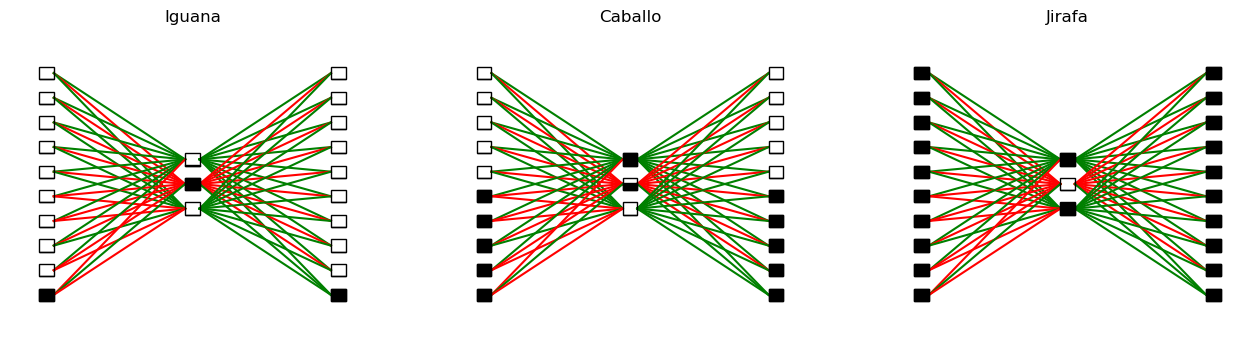

In [9]:
model.fit(X, y)

# Draw the neural network
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# Extract weights and generate dummy neuron values for the visualization
for nombre, idx in animales.items():
    ax[idx].axis('off')
    ax[idx].set_title(nombre)
    inputs = X[idx]
    activations = sigmoid_v(np.matmul(inputs, model.coefs_[0]) + model.intercepts_[0])
    weights = [coefs.T for coefs in model.coefs_]
    prediction = model.predict(inputs.reshape(1, -1))
    neuron_values = [inputs, activations, prediction.flatten()]
    draw_neural_net_rectangular(ax[idx], [10,3,10], weights, neuron_values)
    
plt.show()

En la capa oculta vemos como el autoencoder codifica de alguna manera la entrada para luego poder reproducirla en la salida. Como la inicializacion de los pesos es aleatoria cada vez tendremos una codificacion distinta.

# Referencias:

- [sklearn MLP](https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.neural_network.MLPClassifier.html)

- [Explicacion de Patrick Winston](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-12b-deep-neural-nets/)

- [Minuto donde comienza la explicacion de Winston](https://youtu.be/VrMHA3yX_QI?si=aP3gAVDLsh7ak2qX&t=949)

- [Visualizacion con Tensorflow](https://douglasduhaime.com/posts/visualizing-latent-spaces.html)


# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)